**PART 02** 제1유형: 데이터 전처리

> **CHAPTER 02** 데이터 전처리 개요
> >**02 데이터 변환**

In [ ]:
import pandas as pd
import numpy as np

# 한국인, 일본인 각 성인 1000명 육류소비량 데이터 생성
meat_consumption_korean = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

# 데이터 프레임 생성
meat_consumption = pd.DataFrame({"한국인":meat_consumption_korean, "일본인":meat_consumption_japan})

# 상위 6개 데이터 확인
meat_consumption.head(6)

,한국인,일본인
0,56.628819,31.484504
1,53.384451,31.632620
2,45.394177,39.764792
3,55.659916,32.072853
4,59.737381,26.379853
5,58.645973,27.172710


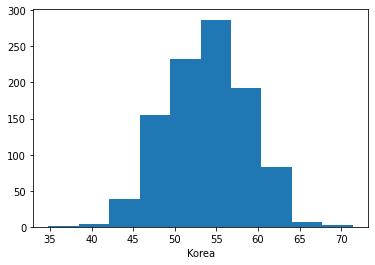

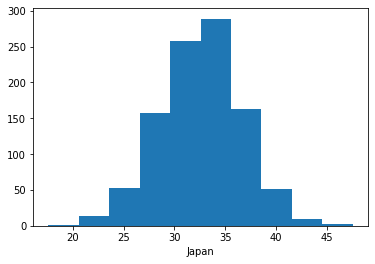

In [ ]:
import matplotlib.pyplot as plt

# 한국인 육류소비량 히스토그램
plt.hist(meat_consumption_korean)
plt.xlabel('Korea')
plt.show()

# 일본인 육류소비량 히스토그램
plt.hist(meat_consumption_japan)
plt.xlabel('Japan')
plt.show()

In [ ]:
# 표준정규화함수에 의한 변환 zscore() 함수 이용
# 기존 데이터프레임에 새로운 Z-표준화된 컬럼을 추가
import scipy.stats as ss

meat_consumption["한국인_정규화"] = ss.zscore(meat_consumption_korean)
meat_consumption["일본인_정규화"] = ss.zscore(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,56.628819,31.484504,0.565643,-0.283237
1,53.384451,31.632620,-0.105712,-0.246492
2,45.394177,39.764792,-1.759134,1.770968
3,55.659916,32.072853,0.365149,-0.137277
4,59.737381,26.379853,1.208896,-1.549619


In [ ]:
# 표준정규화 수식을 직접 입력
# 기존 데이터프레임에 새로운 Z-표준화된 컬럼을 추가
meat_consumption["한국인_정규화2"] = (meat_consumption_korean - np.mean(meat_consumption_korean))/np.std(meat_consumption_korean)
meat_consumption["일본인_정규화2"] = (meat_consumption_japan - np.mean(meat_consumption_japan))/np.std(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2
0,56.628819,31.484504,0.565643,-0.283237,0.565643,-0.283237
1,53.384451,31.632620,-0.105712,-0.246492,-0.105712,-0.246492
2,45.394177,39.764792,-1.759134,1.770968,-1.759134,1.770968
3,55.659916,32.072853,0.365149,-0.137277,0.365149,-0.137277
4,59.737381,26.379853,1.208896,-1.549619,1.208896,-1.549619


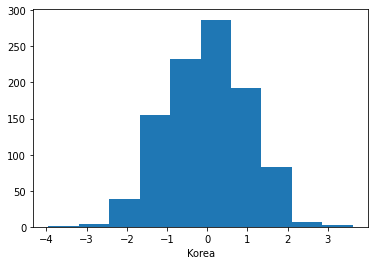

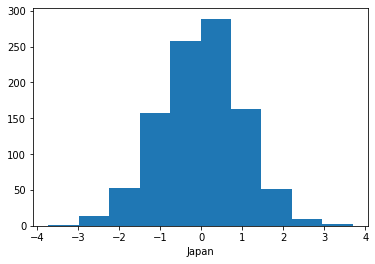

In [ ]:
# 표준화된 데이터에 대한 히스토그램
plt.hist(meat_consumption["한국인_정규화"])
plt.xlabel('Korea')
plt.show()
plt.hist(meat_consumption["일본인_정규화"])
plt.xlabel('Japan')
plt.show()

In [ ]:
# 사이킷런 스케일러 이용 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption["한국인_정규화3"] = scaler.fit_transform(meat_consumption[["한국인"]])

scaler = StandardScaler()
meat_consumption["일본인_정규화3"] = scaler.fit_transform(meat_consumption[["일본인"]])

In [ ]:
# Min-Max변환 MinMaxScaler() 함수 이용
# 기존 데이터프레임에 새로운 표준화된 컬럼을 추가
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption["한국인_mm"] = scaler.fit_transform(meat_consumption[["한국인"]])

scaler = MinMaxScaler()
meat_consumption["일본인_mm"] = scaler.fit_transform(meat_consumption[["일본인"]])

meat_consumption[["한국인", "일본인", "한국인_mm", "일본인_mm"]].head()

,한국인,일본인,한국인_mm,일본인_mm
0,56.628819,31.484504,0.596507,0.463721
1,53.384451,31.632620,0.507824,0.468676
2,45.394177,39.764792,0.289415,0.740745
3,55.659916,32.072853,0.570022,0.483405
4,59.737381,26.379853,0.681477,0.292941


In [ ]:
# Min-Max변환 수식이용
Min = np.min(meat_consumption_korean)
Max = np.max(meat_consumption_korean)
meat_consumption["한국인_mm2"] = (meat_consumption[["한국인"]] - Min) / (Max - Min)

Min = np.min(meat_consumption_japan)
Max = np.max(meat_consumption_japan)
meat_consumption["일본인_mm2"] = (meat_consumption[["일본인"]] - Min) / (Max - Min)

meat_consumption[["한국인_mm", "일본인_mm", "한국인_mm2", "일본인_mm2"]].head()

,한국인_mm,일본인_mm,한국인_mm2,일본인_mm2
0,0.596507,0.463721,0.596507,0.463721
1,0.507824,0.468676,0.507824,0.468676
2,0.289415,0.740745,0.289415,0.740745
3,0.570022,0.483405,0.570022,0.483405
4,0.681477,0.292941,0.681477,0.292941


In [2]:
import pandas as pd
# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/USJudgeRatings.csv")
df.head(5)

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [ ]:
# scipy 패키지 임포트
import scipy.stats as ss

# 지정한 컬럼의 왜도 계산
print(ss.skew(df["CONT"]))
print(ss.skew(df["PHYS"]))

1.0859724796276253
-1.5582154642293153


In [ ]:
# 변수변환 - 로그변환
df["CONT1"] = np.log(df["CONT"])
df["PHYS1"] = np.log(np.max(df["PHYS"] + 1) - df["PHYS"])

# 왜도 계산
print(ss.skew(df["CONT1"]))
print(ss.skew(df["PHYS1"]))

0.6555571886692603
0.5824357748750443


In [ ]:
# 변수변환 - 로그변환
df["CONT2"] = np.log10(df["CONT"])
df["PHYS2"] = np.log10(np.max(df["PHYS"]+1) - df["PHYS"])

# 왜도 계산
print(ss.skew(df["CONT2"]))
print(ss.skew(df["PHYS2"]))

0.6555571886692441
0.5824357748750438


73.5


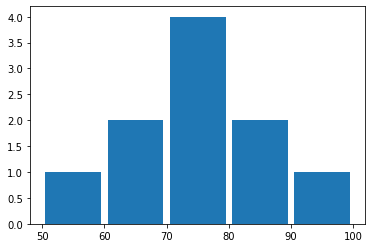

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [ ]:
# 수학점수 (Math_score)
data = [["철수",52], ["영희",92], ["미영",84], ["시완",71], ["미경",65], ["영환",81], ["숙경",66], ["부영",77], ["민섭",73], ["보연",74]]
df = pd.DataFrame(data,columns=['이름','수학점수'])

print(np.mean(df["수학점수"]))

# 히스토그램, 범위 50~100, 5개 구간
plt.hist(df["수학점수"], bins=5, range=[50, 100], rwidth=0.9)
# rwidth로 그래프 폭을 조절할 수 있음(생략 시 기본값 1)
plt.show()
df

In [ ]:
# 조건을 사용해서 구간을 직접 지정
df["등급"] = 0        # 등급 컬럼을 생성하고 0으로 초기화
df.loc[(df["수학점수"]<60), "등급"] = "F"
df.loc[(df["수학점수"]>=60) & (df["수학점수"]<70), "등급"] = "D"
df.loc[(df["수학점수"]>=70) & (df["수학점수"]<80), "등급"] = "C"
df.loc[(df["수학점수"]>=80) & (df["수학점수"]<90), "등급"] = "B"
df.loc[(df["수학점수"]>=90) & (df["수학점수"]<=100), "등급"] = "A"
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [ ]:
# cut() 함수 사용
df["등급"] = pd.cut(x=df["수학점수"], bins=[0,60,70,80,90,100], labels=["F","D","C","B","A"], include_lowest=True)
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [ ]:
# qcut() 함수 사용
df["등급_qcut"] = pd.qcut(x=df["수학점수"], q=5, labels=["F","D","C","B","A"],)
df

,이름,수학점수,등급,등급_qcut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,A
3,시완,71,C,D
4,미경,65,D,F
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,B
8,민섭,73,C,C
9,보연,74,C,C


>>**03 차원축소 : PCA(Principal Component Analysis, 주성분 분석)**

In [3]:
import numpy as np                  # 넘파이 패키지 임포트
import pandas as pd                 # 판다스 패키지 임포트
import matplotlib.pyplot as plt     # 맷플롯립 패키지 임포트

# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임으로 넣는다.
iris = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv")

In [ ]:
# 연속형 변수와 범주형 변수 분리
df = iris.drop(["species"], axis=1)
df_species = iris["species"]

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 변수 정규화
from sklearn.preprocessing import StandardScaler
df["sepal_length"] = StandardScaler().fit_transform(df[["sepal_length"]])
df["sepal_width"] = StandardScaler().fit_transform(df[["sepal_width"]])
df["petal_length"] = StandardScaler().fit_transform(df[["petal_length"]])
df["petal_width"] = StandardScaler().fit_transform(df[["petal_width"]])

# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


>>**04 결측치 처리**

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/df_sample.csv")

x = [14,15,13,14,None,None,19,11,12,18]
df["토론"] = x    # 결측값이 있는 컬럼 '토론' 추가
df.info()           # 데이터프레임 요약정보 출력 : NaN의 개수를 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      10 non-null     object 
 1   중간      10 non-null     int64  
 2   기말      10 non-null     int64  
 3   리포트     10 non-null     int64  
 4   퀴즈      10 non-null     int64  
 5   토론      8 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 608.0+ bytes


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(df.isnull().sum())      # 컬럼별 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 결측치가 있는 모든 행 제거
df_1 = df.dropna(axis=0)

print(df_1.isnull().sum().sum()) # 데이터프레임 결측치 전체
df_1.shape # 데이터프레임 크기

0


(183, 12)

In [ ]:
print(df["Age"].isnull().sum())             # Age 컬럼의 결측치 개수
age_mean = df["Age"].mean()                 # Age 컬럼의 평균
df["Age"].fillna(age_mean, inplace=True)    # Age 컬럼의 결측치를 평균으로 대체
print(df["Age"].isnull().sum())             # Age 컬럼의 결측치 개수

177
0


In [ ]:
# Embarked 컬럼의 결측치를 최빈값으로 대체
from scipy.stats import mode

print(df["Embarked"].isnull().sum())      # Embarked 컬럼의 결측치 개수
embarked_mode = df["Embarked"].mode()     # Embarked 컬럼의 최빈값

# Embarked컬럼의 결측치를 최빈값으로 대체
df["Embarked"].fillna(embarked_mode[0], inplace=True)
print(df["Embarked"].isnull().sum())      # 대체 후 Embarked 컬럼의 결측치 개수

2
0


In [ ]:
df["Embarked"].fillna(method='ffill', inplace=True)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv")

print(df.groupby("Sex")['Age'].mean())
print(df.groupby("Pclass")['Age'].mean())

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df["Age"].fillna(df.groupby("Pclass")["Age"].transform('mean'), inplace=True)

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,NaN,Q


>>**05 이상치(Outlier) 처리**

In [ ]:
import numpy as np                  # 넘파이 패키지 임포트
import pandas as pd                 # 판다스 패키지 임포트
import matplotlib.pyplot as plt     # 맷플롯립 패키지 임포트

# 정규분포 평균 50, 표준편차 10을 가지는 데이터 200개 생성 -> 데이터프레임으로 변환
data = 10 * np.random.randn(200) + 50
df = pd.DataFrame({"값": data})

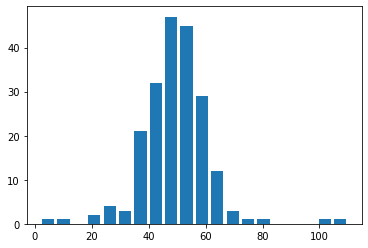

In [ ]:
# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

# 분포 시각화
plt.hist(df["값"], bins=20, rwidth=0.8)
plt.show()

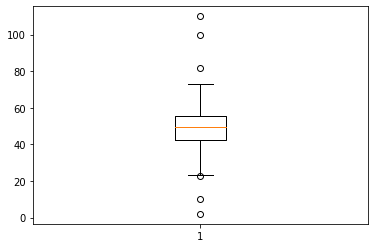

In [ ]:
plt.boxplot(df["값"])
plt.show()

In [ ]:
Q1 = df["값"].quantile(.25)   # 1사분위수
Q2 = df["값"].quantile(.5)    # 2사분위수
Q3 = df["값"].quantile(.75)   # 3사분위수
IQR = Q3 - Q1                 # 사분위범위

print("Q1 =", Q1)
print("Q2 =", Q2)
print("Q3 =", Q3)
print("IQR =", IQR)

Q1 = 42.57837814802595
Q2 = 49.47961830407944
Q3 = 55.5907451247178
IQR = 13.012366976691851


In [ ]:
Q1 = df["값"].describe()["25%"]   # 1사분위수
Q2 = df["값"].describe()["50%"]   # 2사분위수
Q3 = df["값"].describe()["75%"]   # 3사분위수
IQR = Q3 - Q1                     # 사분위범위

print("Q1 =",Q1)
print("Q2 =",Q2)
print("Q3 =",Q3)
print("IQR =",IQR)

Q1 = 42.57837814802595
Q2 = 49.47961830407944
Q3 = 55.5907451247178
IQR = 13.012366976691851


In [ ]:
condition = df["값"] > (Q3 + IQR * 1.5)
upperOutlier = df[condition]
condition = df["값"] < (Q1 - IQR * 1.5)
lowerOutlier = df[condition]

print(lowerOutlier)
print(upperOutlier)

            값
143  22.53248
201   2.00000
203  10.00000
              값
14    81.820485
202  100.000000
204  110.000000


>>**06 평활화(Smoothing)**

In [ ]:
# 깃허브에 있는 Lynx 데이터를 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/lynx.csv")

print(df.head(10))
print(df.describe())

   Unnamed: 0  time  value
0           1  1821    269
1           2  1822    321
2           3  1823    585
3           4  1824    871
4           5  1825   1475
5           6  1826   2821
6           7  1827   3928
7           8  1828   5943
8           9  1829   4950
9          10  1830   2577
       Unnamed: 0         time        value
count  114.000000   114.000000   114.000000
mean    57.500000  1877.500000  1538.017544
std     33.052988    33.052988  1585.843914
min      1.000000  1821.000000    39.000000
25%     29.250000  1849.250000   348.250000
50%     57.500000  1877.500000   771.000000
75%     85.750000  1905.750000  2566.750000
max    114.000000  1934.000000  6991.000000


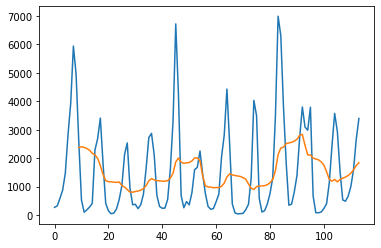

In [ ]:
# 10년 단순이동평균
df["sma"] = df["value"].rolling(10).mean()

plt.plot(df["value"])
plt.plot(df["sma"])
plt.show()

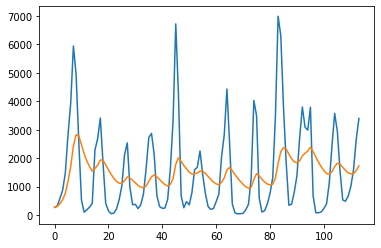

In [ ]:
# 10년 지수가중이동평균
df["ewm"] = df["value"].ewm(10).mean()

plt.plot(df["value"])
plt.plot(df["ewm"])
plt.show()